In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv', usecols=[
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
])

In [3]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

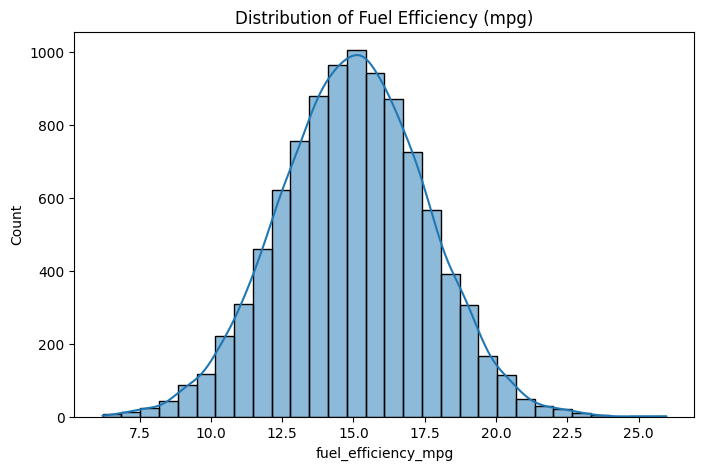

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fuel_efficiency_mpg'], bins=30, kde=True)
plt.title("Distribution of Fuel Efficiency (mpg)")
plt.show()

In [6]:
print("Skewness of fuel_efficiency_mpg:", df['fuel_efficiency_mpg'].skew())

Skewness of fuel_efficiency_mpg: -0.012062219273507922


In [7]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 horsepower    708
dtype: int64


In [8]:
median_hp = df['horsepower'].median()
print("Median horsepower:", median_hp)


Median horsepower: 149.0


In [9]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val   = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test  = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [11]:
y_train = df_train.fuel_efficiency_mpg.values
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
df_train_0 = df_train.fillna(0)
df_val_0   = df_val.fillna(0)

In [13]:
hp_mean = df_train['horsepower'].mean()
df_train_mean = df_train.fillna({'horsepower': hp_mean})
df_val_mean   = df_val.fillna({'horsepower': hp_mean})

In [14]:
def prepare_X(df):
    X = df.values
    ones = np.ones(X.shape[0])
    return np.column_stack([ones, X])


In [15]:
def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [16]:
def linear_regression_predict(X, w0, w):
    return w0 + X.dot(w)

In [17]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

In [18]:
df_train_0 = df_train.fillna(0)
df_val_0   = df_val.fillna(0)

X_train_0 = prepare_X(df_train_0)
X_val_0   = prepare_X(df_val_0)

w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_val_0 = linear_regression_predict(df_val_0, w0_0, w_0)
rmse_0 = rmse(y_val, y_pred_val_0)

In [19]:
hp_mean = df_train['horsepower'].mean()
df_train_mean = df_train.fillna({'horsepower': hp_mean})
df_val_mean   = df_val.fillna({'horsepower': hp_mean})

X_train_mean = prepare_X(df_train_mean)
X_val_mean   = prepare_X(df_val_mean)

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_val_mean = linear_regression_predict(df_val_mean, w0_mean, w_mean)
rmse_mean = rmse(y_val, y_pred_val_mean)

In [20]:
print("Validation RMSE with 0:", round(rmse_0, 2))
print("Validation RMSE with mean:", round(rmse_mean, 2))


Validation RMSE with 0: 0.52
Validation RMSE with mean: 0.46


In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [22]:
# Fill missing values with 0
X_train_r =  df_train.fillna(0)
X_val_r =  df_val.fillna(0)

In [23]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_r, y_train)

    y_pred = model.predict(X_val_r)
    # Compute RMSE manually
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores[r] = round(rmse, 2)

rmse_scores

{0: np.float64(0.52),
 0.01: np.float64(0.52),
 0.1: np.float64(0.52),
 1: np.float64(0.52),
 5: np.float64(0.52),
 10: np.float64(0.52),
 100: np.float64(0.52)}

In [24]:
best_r = min(rmse_scores, key=lambda k: (rmse_scores[k], k))
print("Best r:", best_r, "with RMSE:", rmse_scores[best_r])

Best r: 0 with RMSE: 0.52


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Shuffle and split
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    X_train = df_train.drop(columns=['fuel_efficiency_mpg']).fillna(0)
    X_val = df_val.drop(columns=['fuel_efficiency_mpg']).fillna(0)
    X_test = df_test.drop(columns=['fuel_efficiency_mpg']).fillna(0)

    # Train model (no regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict + RMSE
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = round(np.std(rmse_scores), 3)
print("Validation RMSE scores for each seed:", rmse_scores)
print("Standard deviation of RMSE:", std_rmse)

Validation RMSE scores for each seed: [np.float64(0.5206531296298021), np.float64(0.5213388912857011), np.float64(0.5228069974801978), np.float64(0.5159516741173588), np.float64(0.5109129460065401), np.float64(0.5283406460165996), np.float64(0.5313910658170695), np.float64(0.5090670387374385), np.float64(0.5147399129350906), np.float64(0.5131865908331017)]
Standard deviation of RMSE: 0.007


In [27]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

y_full_train = df_full_train['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

X_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg']).fillna(0)
X_test = df_test.drop(columns=['fuel_efficiency_mpg']).fillna(0)

model = Ridge(alpha=0.001)
model.fit(X_full_train, y_full_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", round(rmse, 3))


Test RMSE: 0.516
